# Netflix TV Show Cancellation Analysis
This notebook contains the final part of our data wrangling process: data analysis. Use the Outline/Table of Contents to easily navigate this notebook.

## Step 1: Data Loading and Preparation
First, we focus on loading and the datasets we created in the `initial_analysis.ipynb` notebook so we can analyze Netflix TV show cancellations in 2023. The `output` folder contains five datasets:
1. `aggregated.csv`: The combined dataset (containing 20 cancelled and 20 non-cancelled Netflix TV shows) in which each title has integer values for columns ‘Hours Viewed’, ‘Total Posts’, ‘Total Comments’, and a Boolean value for the column ‘Cancelled’.
2. `cancelled_shows_hours_viewed.csv`: The number of hours each cancelled TV show was viewed for in 2023.
3. `cancelled_shows_reddit_2023.csv`: The Reddit discussion volume (number of posts and number of comments) in 2023 for each cancelled TV show.
4. `noncancelled_shows_hours_viewed.csv`: The number of hours each non-cancelled TV show was viewed for in 2023.
5. `noncancelled_shows_reddit_2023.csv`: The Reddit discussion volume (number of posts and number of comments) in 2023 for each non-cancelled TV show.

### Step 1.0: Install, Import, and Set Options

Uncomment the lines below to install the required libraries if they are missing in your environment. When the required libraries have been installed, proceed by importing modules and setting options for the `pandas` library.

In [1]:
# %pip install pandas
# %pip install numpy
# %pip install openpyxl
# %pip install seaborn
# %pip install matplotlib
# %pip install scipy
# %pip install scikit-learn
# %pip install statsmodels

In [2]:
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating Logistic Regression
from sklearn.model_selection import train_test_split  # For training Logistic Regression
from sklearn.linear_model import LogisticRegression  # Logistic Regression for the research question
from matplotlib.ticker import FuncFormatter  # For visualisations
import matplotlib.pyplot as plt  # For visualisations
import seaborn as sns  # For visualisations
import scipy.stats as stats # For statistical analysis
import statsmodels.api as sm # For P values
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For array operations  TODO: not used?? remove???
from datetime import datetime  # For handling date columns  TODO: not used?? remove???

pd.set_option("display.max_rows", 20)  # Limit the number of rows displayed when printing a DataFrame
pd.set_option('display.max_colwidth', None)  # Prevent truncation of long text
pd.set_option('display.width', 200)  # Adjust overall display width to prevent line breaks

### Step 1.1: Load Datasets

#TODO: We only load the aggregated dataset. Consider removing the other files, the code generating them, and the corresponding Markdown explanations in both notebooks. If we do this, also change the heading above this cell to singular 'Dataset'.

In [3]:
# Define the path and load the aggregated dataset
aggregated_path = '../output/aggregated.csv'
aggregated_df = pd.read_csv(aggregated_path)

### Step 1.2: Split Data and Identify Most Mentioned Shows

In [4]:
# Split the aggregated dataset into two parts based on the Boolean values
cancelled_shows = aggregated_df[aggregated_df["Cancelled"] == True]
non_cancelled_shows = aggregated_df[aggregated_df["Cancelled"] == False]

# Identify the most discussed show
most_discussed_show = aggregated_df.loc[aggregated_df["Total Comments (2023)"].idxmax()]

# Identify the top 10 shows most mentioned in comments
top_commented_shows = aggregated_df.sort_values(by="Total Comments (2023)", ascending=False).head(10)

### Step 1.3 Define Auxiliary Function

#TODO: parameter `pos` is not accessed. Consider removing it from the function below.

In [31]:
#def millions_formatter(x, pos):
def millions_formatter(x):

    """
    Converts large numbers into human-readable format (millions)
    """
    return f'{x/1e6:.1f}M'


## Step 2: Analyzing Data for Visualisation Purposes

### Step 2.1 Describe Data
#### Describe Cancelled Shows

In [78]:
cancelled_shows.describe().round(1).style.set_properties(**{'text-align': 'center', 'border': '1px solid black'}).format(precision=1)

,Unnamed: 0,Total Hours Viewed in 2023,Total Posts (2023),Total Comments (2023)
count,20.0,20.0,20.0,20.0
mean,9.5,65615000.0,7.6,681.8
std,5.9,61789424.0,15.3,1340.9
min,0.0,6600000.0,0.0,0.0
25%,4.8,23675000.0,0.8,14.2
50%,9.5,44550000.0,2.5,139.0
75%,14.2,86925000.0,5.0,496.5
max,19.0,219300000.0,65.0,4922.0


The average cancelled TV show had about 65.6 million hours viewed in 2023, but there's a wide range (from 6.6 million to 219.3 million). This is reflected in the high standard deviation. On average, cancelled shows had minimal Reddit engagement, with an average of 7.6 posts and 681.8 comments, with some shows having no engagement at all (minimum of 0 for both posts and comments). The maximum number of comments (4922) indicates some cancelled shows generated significant discussion.

#### Describe Non-Cancelled Shows

In [77]:
non_cancelled_shows.describe().round(1).style.set_properties(**{'text-align': 'center', 'border': '1px solid black'}).format(precision=1)

,Unnamed: 0,Total Hours Viewed in 2023,Total Posts (2023),Total Comments (2023)
count,20.0,20.0,20.0,20.0
mean,29.5,20455000.0,13.4,916.0
std,5.9,44818669.5,24.9,1767.6
min,20.0,400000.0,0.0,0.0
25%,24.8,3425000.0,1.0,20.5
50%,29.5,9000000.0,5.0,196.0
75%,34.2,14025000.0,9.0,447.8
max,39.0,204800000.0,93.0,5696.0


Non-cancelled shows have a much lower mean number of hours viewed (20.5 million) compared to cancelled shows (65.6 million), and a larger standard deviation, indicating more variability. The average number of Reddit posts (13.4) for non-cancelled shows is nearly twice that of cancelled shows (7.6). The average number of comments (916) is also higher for non-cancelled shows compared to cancelled shows (681.8) reflecting greater engagement. Similar to cancelled shows, there are shows with zero posts and comments for non-cancelled shows.

#### Describe Cancelled and Non-Cancelled Shows

In [ ]:
aggregated_df.describe().round(1).style.set_properties(**{'text-align': 'center', 'border': '1px solid black'}).format(precision=1)

,Unnamed: 0,Total Hours Viewed in 2023,Total Posts (2023),Total Comments (2023),Cancelled,Total Engagement,Total Discussion
count,40.0,40.0,40.0,40.0,40.0,40.0,40.0
mean,19.5,43035000.0,10.5,798.9,0.5,809.4,809.4
std,11.7,57978893.4,20.6,1553.1,0.5,1573.2,1573.2
min,0.0,400000.0,0.0,0.0,0.0,0.0,0.0
25%,9.8,7850000.0,1.0,17.5,0.0,18.5,18.5
50%,19.5,15900000.0,3.0,151.5,0.5,155.0,155.0
75%,29.2,48800000.0,5.2,496.5,1.0,499.2,499.2
max,39.0,219300000.0,93.0,5696.0,1.0,5789.0,5789.0


Combining both cancelled and non-cancelled shows, the average viewership was 43 million hours in 2023, with a wide range in viewing hours (from 400,000 to 219.3 million). The discussion volume remains quite varied across all shows, with an average of 10.5 posts and 798.9 comments. The standard deviations are high for all columns, suggesting that the shows are diverse, and there are a few outliers which significantly influence the means.

### Step 2.2 Compute Mean Values and Generate Bar Plots

#TODO(addressed): Consider dropping the 'Complete Dataset' means and just displaying the means in tables rather than bar plots.

In [ ]:
#Displaying the means in tables rather than bar plots.
mean_cancellation_status = aggregated_df.groupby('Cancelled')[[
    'Total Posts (2023)',
    'Total Comments (2023)',
    'Total Hours Viewed in 2023'
]].mean()

mean_cancellation_status.columns.name = 'Cancelled'
mean_cancellation_status.index.name = None
mean_cancellation_status.round(1).style.set_properties(**{'text-align': 'center', 'border': '1px solid black'})

Cancelled,Total Posts (2023),Total Comments (2023),Total Hours Viewed in 2023
0,13.400000,916.000000,20455000.000000
1,7.600000,681.800000,65615000.000000


In [89]:
# COMMENTED OUT - REMOVE UPON AGREEMENT 

#  Convert the 'Cancelled' column to boolean type
#aggregated_df['Cancelled'] = aggregated_df['Cancelled'].astype(bool)

# Compute for each cancellation status (bool) the mean value of each column
#mean_cancellation_status = aggregated_df.groupby('Cancelled')[[
    #'Total Posts (2023)', 
    #'Total Comments (2023)', 
    #'Total Hours Viewed in 2023'
#]].mean()

#Compute the mean value of each column (combined: disregarding cancellation status)
#mean_complete = aggregated_df[[
   # 'Total Posts (2023)', 
   # 'Total Comments (2023)', 
   # 'Total Hours Viewed in 2023'
#]].mean()

# Define labels
#metrics = ['Total Posts (2023)', 'Total Comments (2023)', 'Total Hours Viewed in 2023']
#metric_names = ['Total Posts', 'Total Comments', 'Total Viewership']
#categories = ['Cancelled', 'Non-Cancelled', 'Complete Dataset']
#colors = ['#FF9999', '#FF3333', '#990000']

# Loop over metrics defined above
#for i, metric in enumerate(metrics):
   # fig, ax = plt.subplots(figsize=(12, 6))

    # Define bars
  #  bars = [
  #     mean_cancellation_status.loc[True, metric], 
  #      mean_cancellation_status.loc[False, metric], 
  #      mean_complete[metric]
  #  ]

    # Define bar plot
  #  bars_plot = ax.bar(categories, bars, color = colors)

    # Format bars
    #for bar in bars_plot:
       #height = bar.get_height()
      #  ax.annotate(f'{height:.2f}',
                #    xy = (bar.get_x() + bar.get_width() / 2, height),
                  #  xytext = (0, 5),
                  #  textcoords = "offset points",
                   # ha='center', fontsize = 12, fontweight = 'bold')
        
    # Format title and axis labels
    #ax.set_title(f"Mean {metric_names[i]} by Category", fontsize = 14)
   # ax.set_ylabel(metric_names[i], fontsize = 12)
    #ax.set_xlabel("Show Type", fontsize = 12)

    # Format grid
    #plt.grid(axis = 'y', linestyle='--', alpha = 0.7)

    # Show the plot
    #plt.show()


### Step 2.3 Viewership and Total Engagement (Comments + Posts)

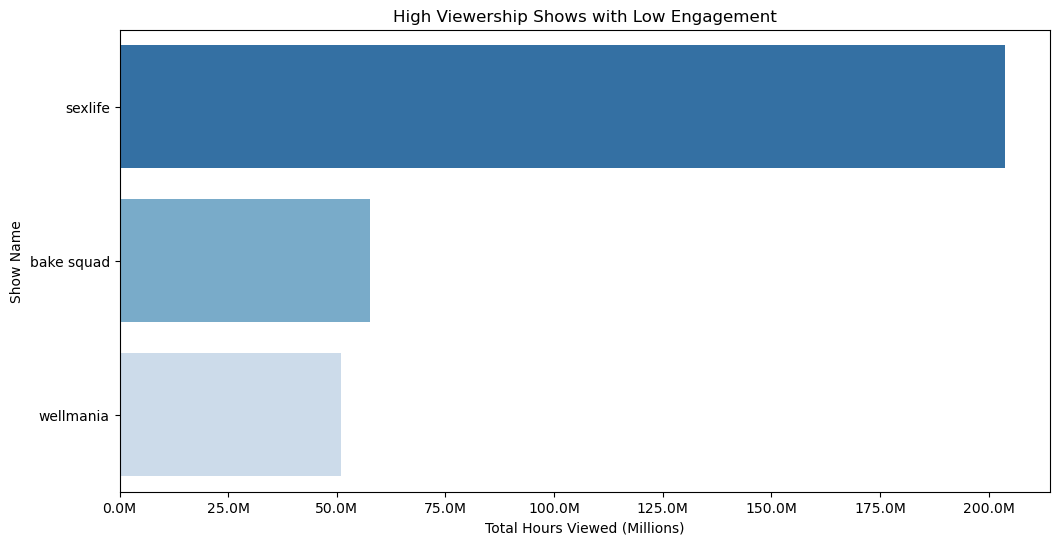

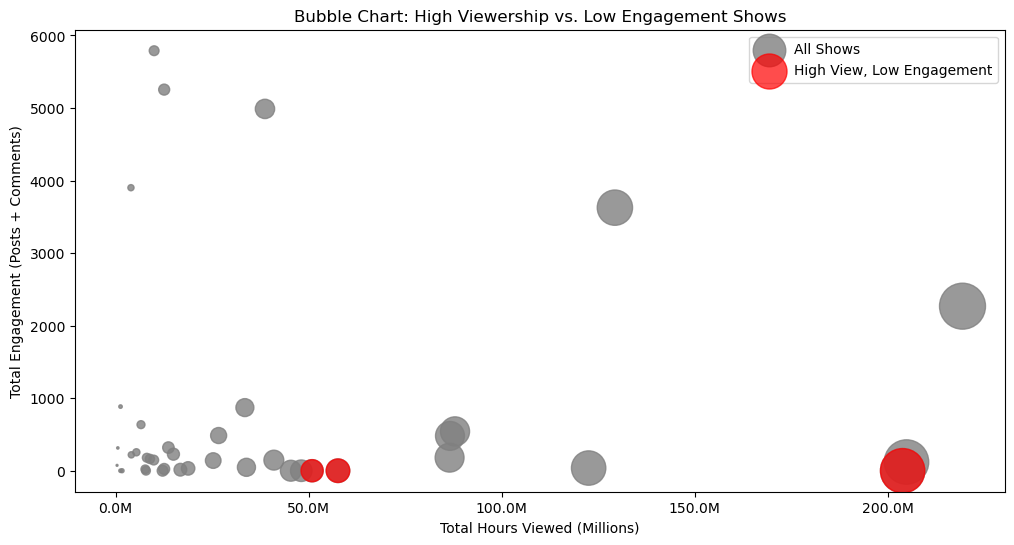

In [10]:
# (Low Engagement = Posts + Comments < Threshold) 
# Actually became more of a measure of the success of the API calls
engage_thresh = 10
high_viewership_thresh = aggregated_df["Total Hours Viewed in 2023"].quantile(0.75)  # Top 25% views
aggregated_df["Total Engagement"] = aggregated_df["Total Posts (2023)"] + aggregated_df["Total Comments (2023)"]
high_view_low_engagement = aggregated_df[(aggregated_df["Total Hours Viewed in 2023"] >= high_viewership_thresh) & (aggregated_df["Total Engagement"] < engage_thresh)].sort_values(by="Total Hours Viewed in 2023", ascending=False)

# Visualization 1: Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data = high_view_low_engagement,
    x = "Total Hours Viewed in 2023",
    y = "Normalized_Show_Name",
    palette = "Blues_r"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Show Name")
plt.title("High Viewership Shows with Low Engagement")
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


# Visualization 2: Bubble Chart
plt.figure(figsize = (12, 6))
plt.scatter(
    aggregated_df["Total Hours Viewed in 2023"],
    aggregated_df["Total Engagement"],
    s = aggregated_df["Total Hours Viewed in 2023"] / 2e5, 
    alpha = 0.8,
    label = "All Shows",
    color = "gray"
)
plt.scatter(
    high_view_low_engagement["Total Hours Viewed in 2023"],
    high_view_low_engagement["Total Engagement"],
    s=high_view_low_engagement["Total Hours Viewed in 2023"] / 2e5,
    alpha = 0.7,
    label = "High View, Low Engagement",
    color = "red"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Total Engagement (Posts + Comments)")
plt.title("Bubble Chart: High Viewership vs. Low Engagement Shows")
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


### Step 2.4 Total Hours Viewed and Total Number of Comments

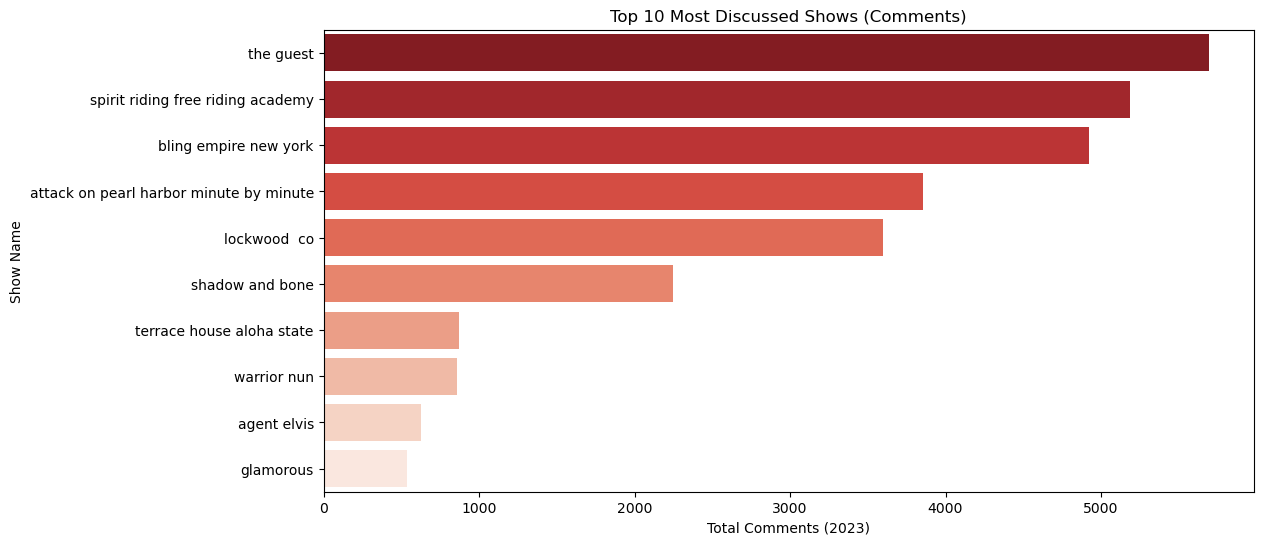

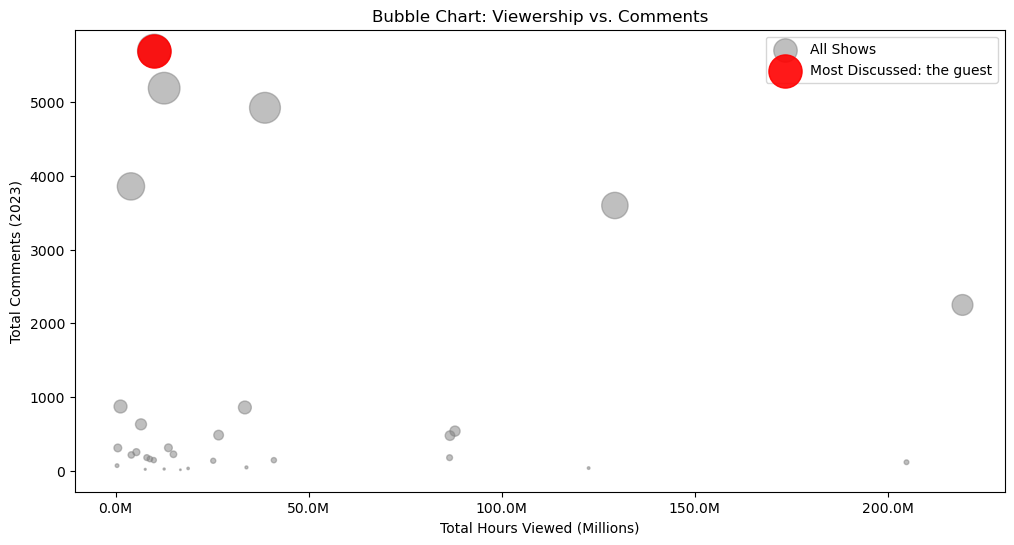

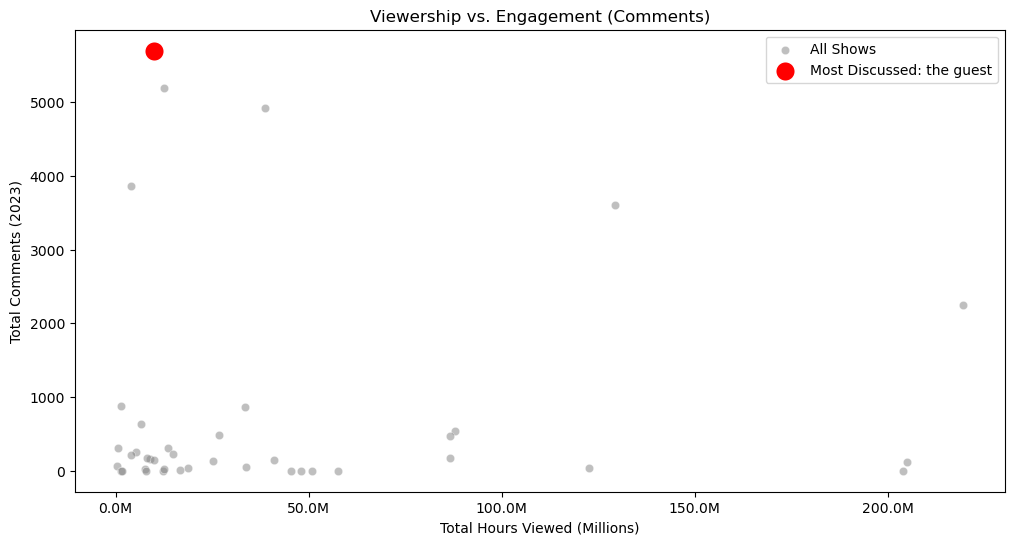

In [11]:
# Visualization 1: Bar Chart (Top Shows by Comments)
plt.figure(figsize = (12, 6))
sns.barplot(
    data = top_commented_shows,
    x = "Total Comments (2023)",
    y = "Normalized_Show_Name",
    palette = "Reds_r"
)
plt.xlabel("Total Comments (2023)")
plt.ylabel("Show Name")
plt.title("Top 10 Most Discussed Shows (Comments)")
plt.show()

# Visualization 2: Bubble Chart (Viewership vs. Comments)
plt.figure(figsize=(12, 6))
plt.scatter(
    aggregated_df["Total Hours Viewed in 2023"],
    aggregated_df["Total Comments (2023)"],
    s = aggregated_df["Total Comments (2023)"] / 10, 
    alpha = 0.5,
    label = "All Shows",
    color = "gray"
)
plt.scatter(
    most_discussed_show["Total Hours Viewed in 2023"],
    most_discussed_show["Total Comments (2023)"],
    s = most_discussed_show["Total Comments (2023)"] / 10,
    alpha = 0.9,
    label = f"Most Discussed: {most_discussed_show['Normalized_Show_Name']}",
    color = "red"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Total Comments (2023)")
plt.title("Bubble Chart: Viewership vs. Comments")
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter)) 
plt.show()

# Visualization 3: Scatter Plot (Viewership vs. Comments)
plt.figure(figsize = (12, 6))
sns.scatterplot(
    data = aggregated_df,
    x = "Total Hours Viewed in 2023",
    y = "Total Comments (2023)",
    color = "gray",
    alpha = 0.5,
    label = "All Shows"
)
sns.scatterplot(
    x = [most_discussed_show["Total Hours Viewed in 2023"]],
    y = [most_discussed_show["Total Comments (2023)"]],
    color = "red",
    s = 200,
    label = f"Most Discussed: {most_discussed_show['Normalized_Show_Name']}"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Total Comments (2023)")
plt.title("Viewership vs. Engagement (Comments)")
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


### Step 2.5 Differences in Mean Viewership Between Cancelled and Non-Cancelled Shows

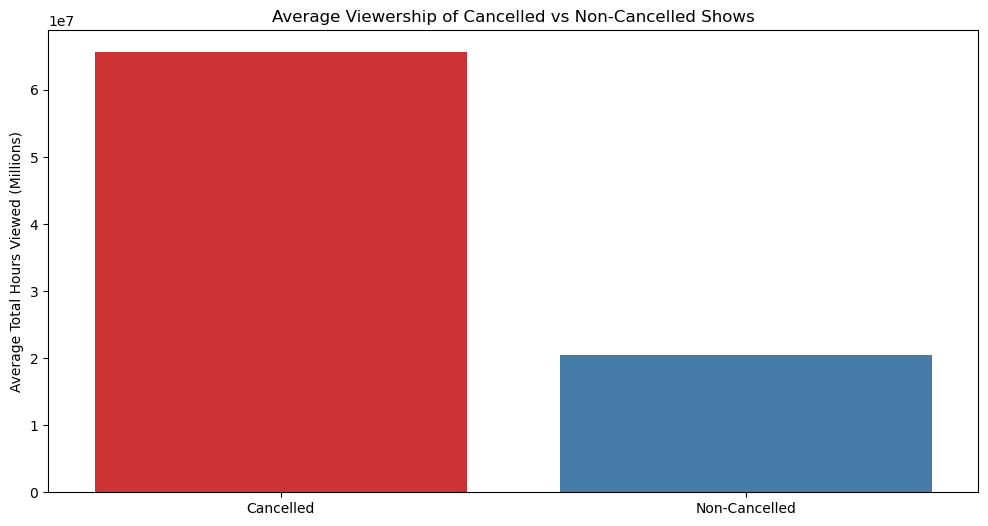

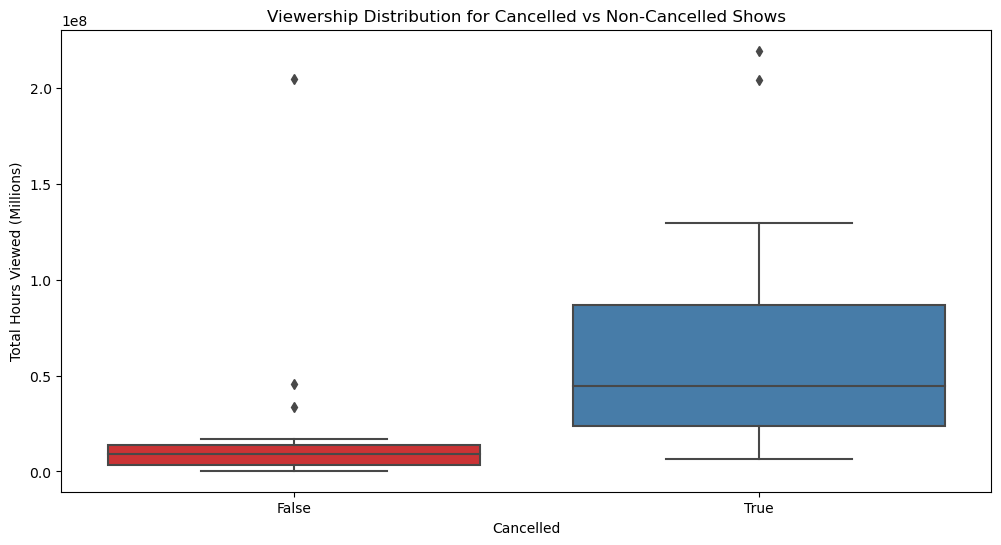

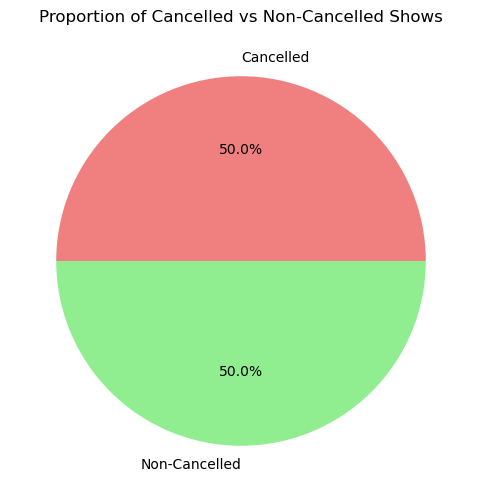

In [12]:
# Visualization 1: Bar Chart (Viewership of Cancelled vs Non-Cancelled Shows)
plt.figure(figsize = (12, 6))
sns.barplot(
    x = ["Cancelled", "Non-Cancelled"],
    y = [cancelled_shows["Total Hours Viewed in 2023"].mean(), non_cancelled_shows["Total Hours Viewed in 2023"].mean()],
    palette="Set1"
)
plt.ylabel("Average Total Hours Viewed (Millions)")
plt.title("Average Viewership of Cancelled vs Non-Cancelled Shows")
plt.show()

# Visualization 2: Box Plot (Viewership Distribution)
plt.figure(figsize = (12, 6))
sns.boxplot(
    x = "Cancelled", 
    y = "Total Hours Viewed in 2023", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Hours Viewed (Millions)")
plt.title("Viewership Distribution for Cancelled vs Non-Cancelled Shows")
plt.show()

# Visualization 3: Pie Chart (Proportion of Cancelled vs Non-Cancelled Shows)
plt.figure(figsize = (12, 6))
cancelled_count = cancelled_shows.shape[0]
non_cancelled_count = non_cancelled_shows.shape[0]
plt.pie([cancelled_count, non_cancelled_count], labels = ["Cancelled", "Non-Cancelled"], autopct = '%1.1f%%', colors = ["lightcoral", "lightgreen"])
plt.title("Proportion of Cancelled vs Non-Cancelled Shows")
plt.show()


In [13]:
t_stat, p_value = stats.ttest_ind(cancelled_shows["Total Hours Viewed in 2023"], non_cancelled_shows["Total Hours Viewed in 2023"])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05: print("There is a statistically significant difference in the average viewership between cancelled and non-cancelled shows.")
else: print("There is no statistically significant difference in the average viewership between cancelled and non-cancelled shows.")


T-statistic: 2.646
P-value: 0.012
There is a statistically significant difference in the average viewership between cancelled and non-cancelled shows.


## Note: due to low number of datapoints, the conclusion here would actually be: high viewership causes cancellations. 

--- 
## 2.4 Differences in the mean number of posts between cancelled and non-cancelled shows

---

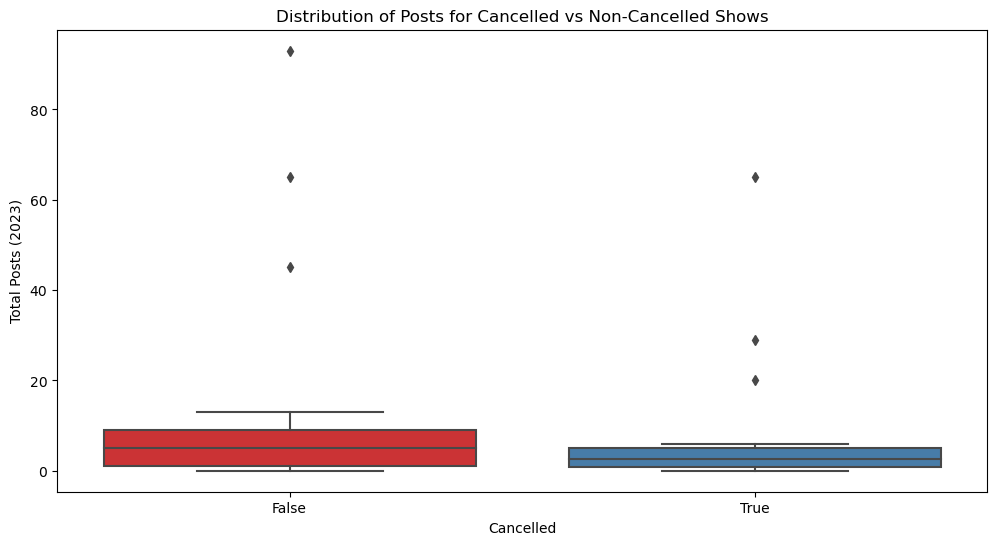

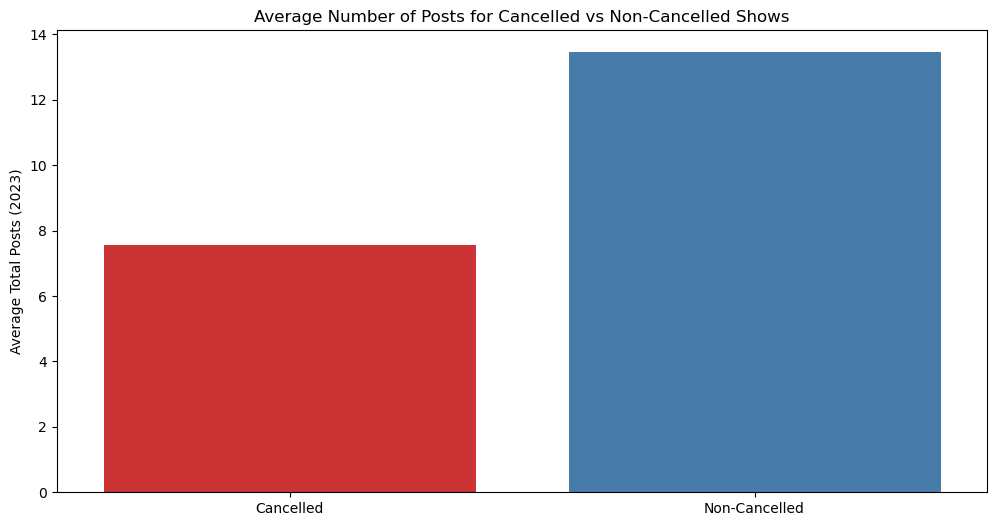

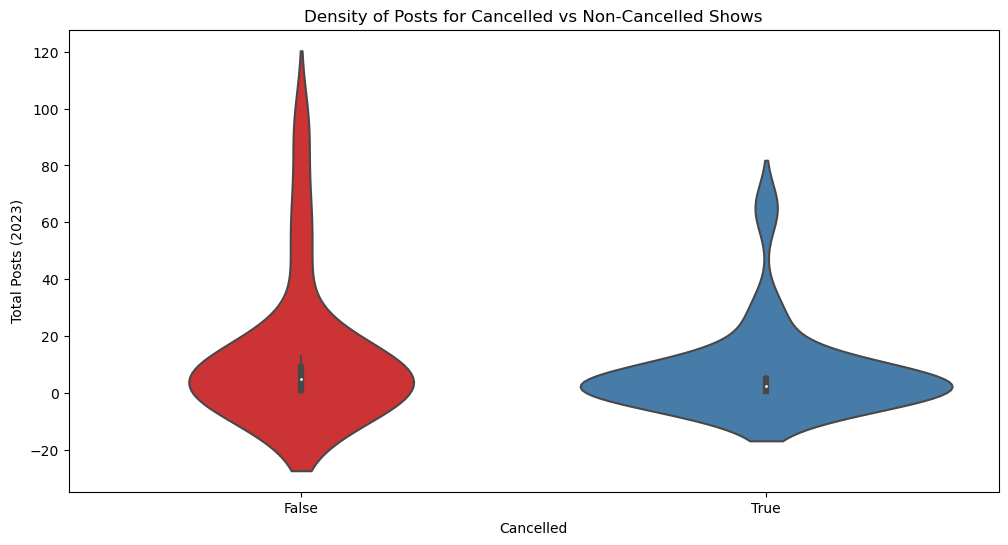

In [14]:
# Visualization 1: Box Plot (Distribution of Posts for Cancelled vs Non-Cancelled Shows)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x = "Cancelled", 
    y = "Total Posts (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Posts (2023)")
plt.title("Distribution of Posts for Cancelled vs Non-Cancelled Shows")
plt.show()

# Visualization 2: Bar Plot (Average Number of Posts for Cancelled vs Non-Cancelled Shows)
plt.figure(figsize=(12, 6))
sns.barplot(
    x = ["Cancelled", "Non-Cancelled"],
    y = [cancelled_shows["Total Posts (2023)"].mean(), non_cancelled_shows["Total Posts (2023)"].mean()],
    palette = "Set1"
)
plt.ylabel("Average Total Posts (2023)")
plt.title("Average Number of Posts for Cancelled vs Non-Cancelled Shows")
plt.show()

# Visualization 3: Violin Plot (Post Distribution Density for Cancelled vs Non-Cancelled Shows)
plt.figure(figsize=(12, 6))
sns.violinplot(
    x = "Cancelled", 
    y = "Total Posts (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Posts (2023)")
plt.title("Density of Posts for Cancelled vs Non-Cancelled Shows")
plt.show()

In [15]:
t_stat_posts, p_value_posts = stats.ttest_ind(cancelled_shows["Total Posts (2023)"], non_cancelled_shows["Total Posts (2023)"])

print(f"T-statistic for Posts: {t_stat_posts:.3f}")
print(f"P-value for Posts: {p_value_posts:.3f}")

if p_value_posts < 0.05: print("There is a statistically significant difference in the number of posts between cancelled and non-cancelled shows.")
else: print("There is no statistically significant difference in the number of posts between cancelled and non-cancelled shows.")

T-statistic for Posts: -0.902
P-value for Posts: 0.373
There is no statistically significant difference in the number of posts between cancelled and non-cancelled shows.


---

## 2.5 Differences in the mean number of comments between cancelled and non-cancelled shows.

---

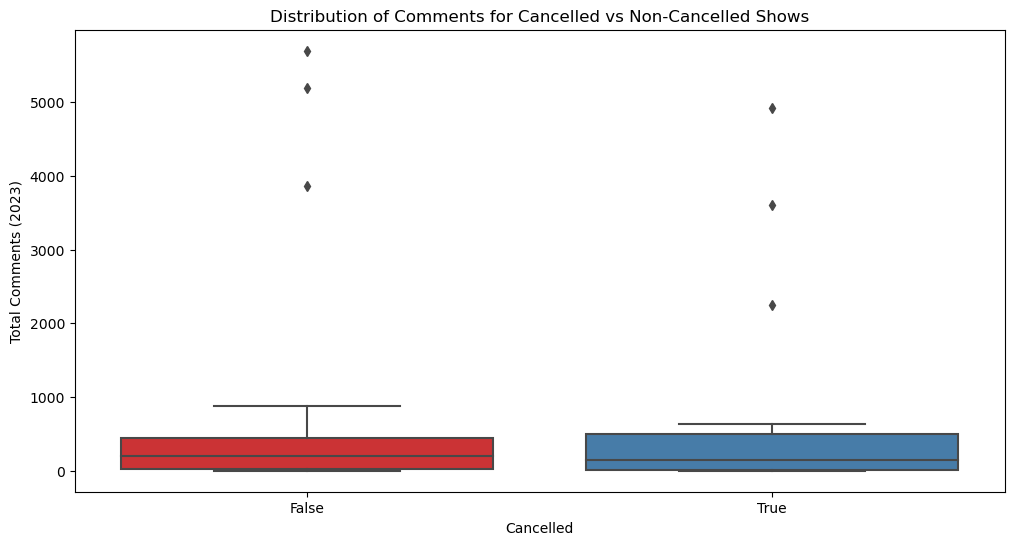

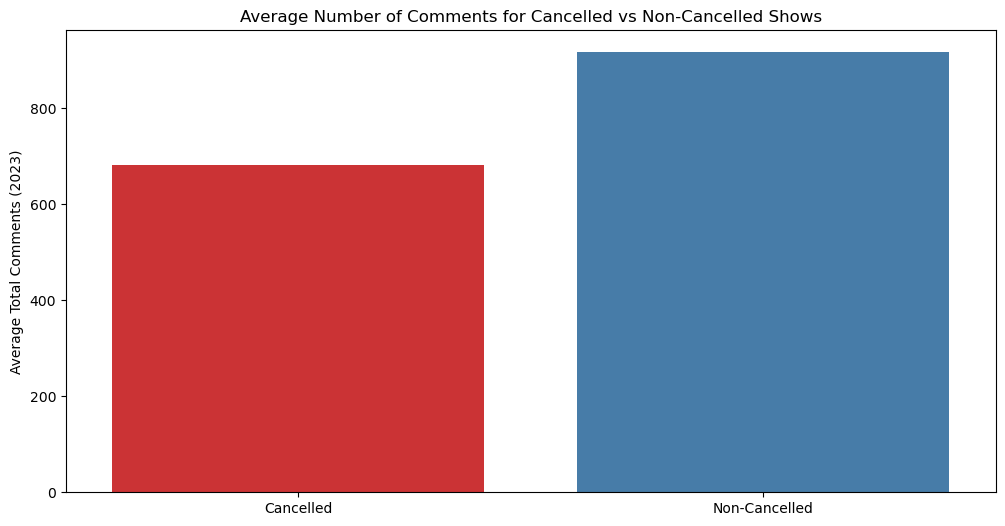

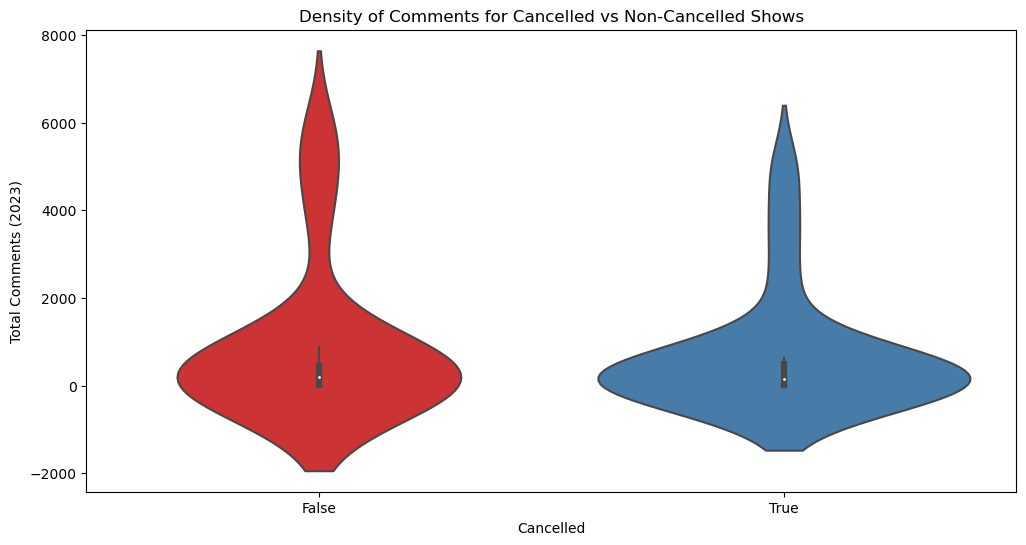

In [16]:
# Visualization 1: Box Plot (Distribution of Comments for Cancelled vs Non-Cancelled Shows)
plt.figure(figsize = (12, 6))
sns.boxplot(
    x = "Cancelled", 
    y = "Total Comments (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Comments (2023)")
plt.title("Distribution of Comments for Cancelled vs Non-Cancelled Shows")
plt.show()

# Visualization 2: Bar Plot (Average Number of Comments for Cancelled vs Non-Cancelled Shows)
plt.figure(figsize = (12, 6))
sns.barplot(
    x = ["Cancelled", "Non-Cancelled"],
    y = [cancelled_shows["Total Comments (2023)"].mean(), non_cancelled_shows["Total Comments (2023)"].mean()],
    palette = "Set1"
)
plt.ylabel("Average Total Comments (2023)")
plt.title("Average Number of Comments for Cancelled vs Non-Cancelled Shows")
plt.show()

# Visualization 3: Violin Plot (Comment Distribution Density for Cancelled vs Non-Cancelled Shows)
plt.figure(figsize = (12, 6))
sns.violinplot(
    x = "Cancelled", 
    y = "Total Comments (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Comments (2023)")
plt.title("Density of Comments for Cancelled vs Non-Cancelled Shows")
plt.show()

In [17]:
t_stat_comments, p_value_comments = stats.ttest_ind(cancelled_shows["Total Comments (2023)"], non_cancelled_shows["Total Comments (2023)"])

print(f"T-statistic for Comments: {t_stat_comments:.3f}")
print(f"P-value for Comments: {p_value_comments:.3f}")

if p_value_comments < 0.05: print("There is a statistically significant difference in the number of comments between cancelled and non-cancelled shows.")
else: print("There is no statistically significant difference in the number of comments between cancelled and non-cancelled shows.")

T-statistic for Comments: -0.472
P-value for Comments: 0.640
There is no statistically significant difference in the number of comments between cancelled and non-cancelled shows.


---

## 2.6 corellation between the number of posts and total hours viewed

---

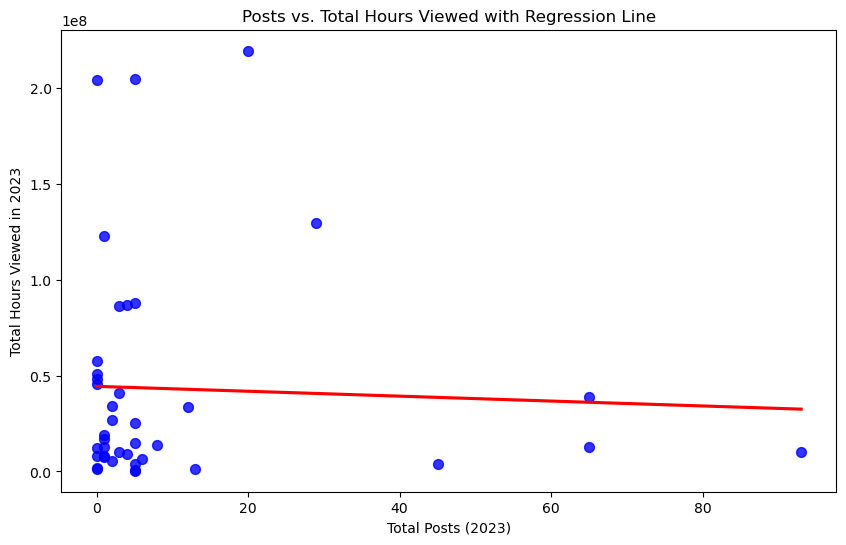

In [18]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Total Hours Viewed)
plt.figure(figsize = (10, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Hours Viewed in 2023", 
    data = aggregated_df, 
    scatter_kws = {'s': 50, 'color': 'blue'},
    line_kws = {'color': 'red'}, 
    ci = None 
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Hours Viewed in 2023")
plt.title("Posts vs. Total Hours Viewed with Regression Line")
plt.show()


In [19]:
corr, p_value = stats.pearsonr(aggregated_df["Total Posts (2023)"], aggregated_df["Total Hours Viewed in 2023"])

print(f"Pearson corellation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05: print("There is a statistically significant positive corellation between the number of posts and total hours viewed.")
else: print("There is no statistically significant corellation between the number of posts and total hours viewed.")


Pearson corellation Coefficient: -0.045
P-value: 0.780
There is no statistically significant corellation between the number of posts and total hours viewed.


---

## 2.7 corellation between the number of posts and the number of comments

---

# Was part of an idea that no longer seems relevant. keeping it here in case we need more

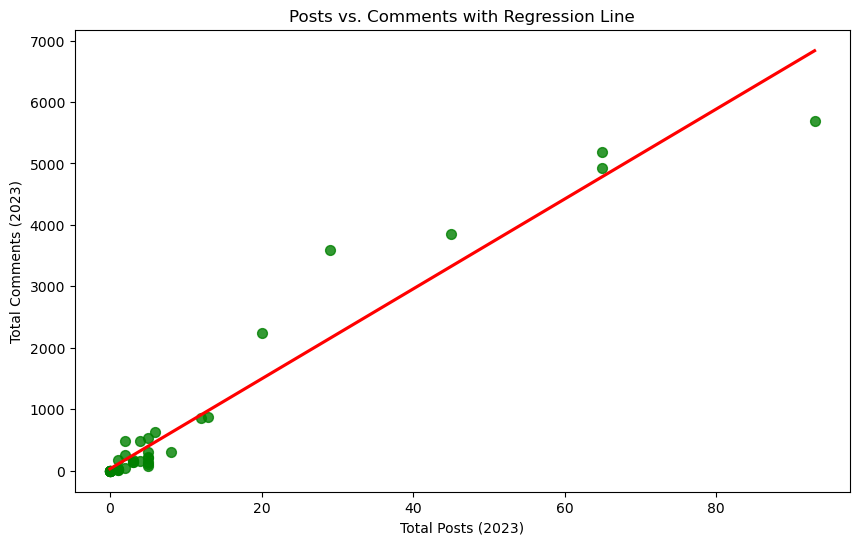

In [20]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Comments), aggregate dataset
plt.figure(figsize = (10, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Comments (2023)", 
    data = aggregated_df, 
    scatter_kws = {'s': 50, 'color': 'green'}, 
    line_kws = {'color': 'red'}, 
    ci = None
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Comments (2023)")
plt.title("Posts vs. Comments with Regression Line")
plt.show()


In [21]:
corr_posts_comments_aggregate_df, p_value_posts_comments_aggregate_df = stats.pearsonr(aggregated_df["Total Posts (2023)"], aggregated_df["Total Comments (2023)"])

print(f"Pearson corellation Coefficient (Posts vs Comments): {corr_posts_comments_aggregate_df:.3f}")
print(f"P-value: {p_value_posts_comments_aggregate_df:.3f}")

if p_value_posts_comments_aggregate_df < 0.05: print("There is a statistically significant positive corellation between the number of posts and the number of comments.")
else: print("There is no statistically significant corellation between the number of posts and the number of comments.")


Pearson corellation Coefficient (Posts vs Comments): 0.972
P-value: 0.000
There is a statistically significant positive corellation between the number of posts and the number of comments.


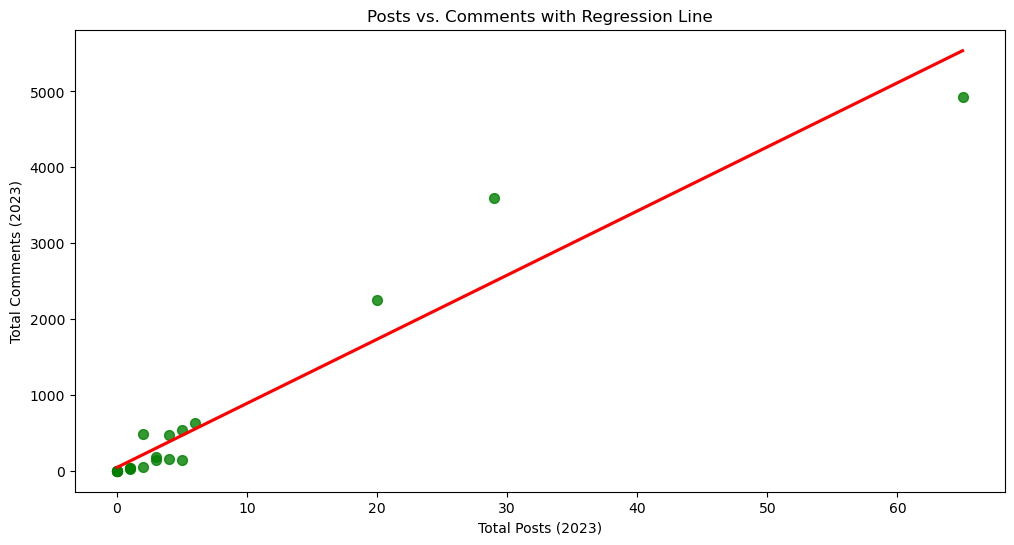

In [22]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Comments), cancelled shows
plt.figure(figsize = (12, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Comments (2023)", 
    data = cancelled_shows, 
    scatter_kws = {'s': 50, 'color': 'green'}, 
    line_kws = {'color': 'red'}, 
    ci = None
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Comments (2023)")
plt.title("Posts vs. Comments with Regression Line")
plt.show()


In [23]:
corr_posts_comments_cancelled, p_value_posts_comments_cancelled = stats.pearsonr(cancelled_shows["Total Posts (2023)"], cancelled_shows["Total Comments (2023)"])

print(f"Pearson corellation Coefficient (Posts vs Comments): {corr_posts_comments_cancelled:.3f}")
print(f"P-value: {p_value_posts_comments_cancelled:.3f}")

if p_value_posts_comments_cancelled < 0.05: print("There is a statistically significant positive corellation between the number of posts and the number of comments.")
else: print("There is no statistically significant corellation between the number of posts and the number of comments.")


Pearson corellation Coefficient (Posts vs Comments): 0.967
P-value: 0.000
There is a statistically significant positive corellation between the number of posts and the number of comments.


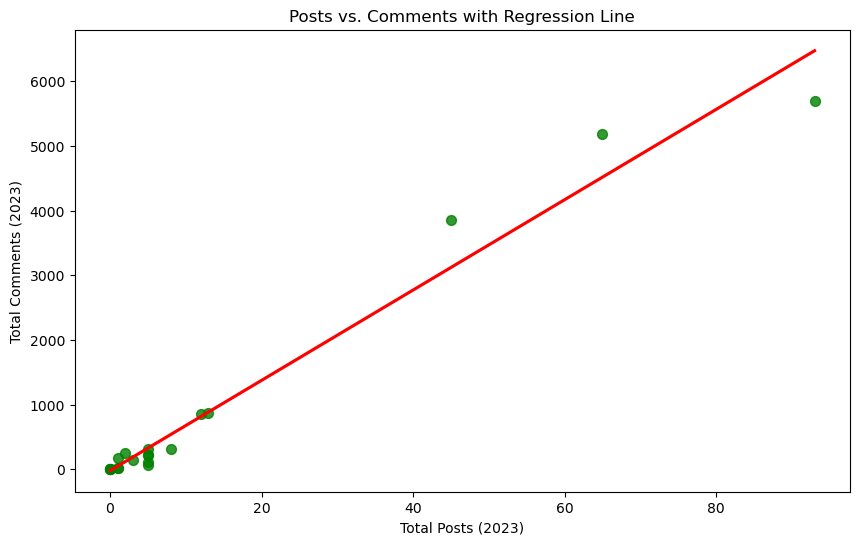

In [24]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Comments), non-cancelled shows
plt.figure(figsize = (10, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Comments (2023)", 
    data = non_cancelled_shows, 
    scatter_kws = {'s': 50, 'color': 'green'}, 
    line_kws = {'color': 'red'}, 
    ci = None
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Comments (2023)")
plt.title("Posts vs. Comments with Regression Line")
plt.show()


In [25]:
corr_posts_comments_non_cancelled, p_value_posts_comments_non_cancelled = stats.pearsonr(non_cancelled_shows["Total Posts (2023)"], non_cancelled_shows["Total Comments (2023)"])

print(f"Pearson corellation Coefficient (Posts vs Comments): {corr_posts_comments_non_cancelled:.3f}")
print(f"P-value: {p_value_posts_comments_non_cancelled:.3f}")

if p_value_posts_comments_non_cancelled < 0.05: print("There is a statistically significant positive corellation between number of posts and the number of comments.")
else: print("There is no statistically significant corellation between the number of posts and the number of comments.")

Pearson corellation Coefficient (Posts vs Comments): 0.985
P-value: 0.000
There is a statistically significant positive corellation between number of posts and the number of comments.


---

# 3.0 Does audience engagement* influence the cancellation of Netflix TV shows in 2023?
###  *Audience engagement is measured by the volume of  discussions on Reddit and the number of viewers 

---

---

## 3.1 Sub Research Questions

---

### 3.1.0 Are the hours spent viewing Netflix TV shows (at the end of their final season) correlated with the decision to cancel them? 

H0: There is no correlation between the total viewership hours and cancellation. \
H1: There is a significant positive correlation between viewership hours and cancellation. \
H2: There is a significant negative correlation between viewership hours and cancellation.

In [26]:
corr, p_value_corr = stats.pointbiserialr(aggregated_df["Cancelled"].astype(int), aggregated_df["Total Hours Viewed in 2023"])

print("Correlation: r = {corr:.4f}, p-value = {p_value_corr:.4f}")

if p_value_corr < 0.05:
    if corr > 0: print("Significant positive correlation: Higher viewership is correlated to more cancellations.")
    else: print("Significant negative correlation: Higher viewership is correlated to fewer cancellations.")
else: print("No significant correlation between viewership and cancellation.")

Correlation: r = {corr:.4f}, p-value = {p_value_corr:.4f}
Significant positive correlation: Higher viewership is correlated to more cancellations.


### 3.1.1 Is the volume of discussion on Reddit (r/television (17 million members) and r/NetflixBestOf (11 million members)) during their final season (year) associated with the cancellation of Netflix TV shows as opposed to those not cancelled? 

H0: There is no correlation between the total discussion and cancellation. \
H1: There is significant positive correlation between total discussion and cancellation \
H2: There is significant negative correlation between total discussion and cancellation.



In [27]:
aggregated_df["Total Discussion"] = aggregated_df["Total Posts (2023)"] + aggregated_df["Total Comments (2023)"]
corr, p_value_corr = stats.pointbiserialr(aggregated_df["Cancelled"].astype(int), aggregated_df["Total Discussion"])

print(f"Correlation: r = {corr:.4f}, p-value = {p_value_corr:.4f}")

if p_value_corr < 0.05:
    if corr > 0: print("Significant positive correlation: increased discussion is correlated to more cancellations.")
    else: print("Significant negative correlation: increased discussion is correllated to fewer cancellations.")
else: print("No significant correlation between discussion volume and cancellation.")

Correlation: r = -0.0773, p-value = 0.6356
No significant correlation between discussion volume and cancellation.


---

## 3.2 Predicting cancellations with audience engagement using logistic regression

---

Testing whether independent variables x1, x2 and x3 can be used to predict whether a tv-show will be cancelled. Using the Wald-test to test model significance and evaluating psuedo-R^2 to see whether the model explains the variance in the dataset.

x1 = "total posts on reddit in 2023" \
x2 = "total comments on reddit in 2023" \
x3 = "total Netflix viewership in hours in 2023" \


H0: Independent variables x1, x2, and x3 are not sufficient to create a statistically significant (p < 0.05) logistic regression model that predicts Netflix TV-Show cancellations and the model's pseudo R^2 suggests weak explanatory power (Pseudo R^2 < 0.02). \

H1: Independent variables x1, x2, and x3 are sufficient to create a statistically significant (p <0.05) logistic regression model that predicts Netflix TV-Show cancellations and the model's pseudo R^2 suggests meaningful explanatory power (Pseudo R^2 > 0.02).

In [ ]:
# Encode the target variable 'Cancelled' (True/False to 1/0)
aggregated_df['Cancelled'] = aggregated_df['Cancelled'].astype(int)

# Define independent variables (X) and the dependent variable (y)
X = aggregated_df[["Total Posts (2023)", "Total Comments (2023)", "Total Hours Viewed in 2023"]]
y = aggregated_df["Cancelled"]

# Split the data into training and test sets (80% raining, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Fit the Logistic Regression model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
X_train_with_intercept = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()

print(result.summary(), "\n")

y_pred = model.predict(X_test)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred), "\n")
print("\nClassification Report:", classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.516834
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Cancelled   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                  0.2458
Time:                        21:41:40   Log-Likelihood:                -16.539
converged:                       True   LL-Null:                       -21.930
Covariance Type:            nonrobust   LLR p-value:                   0.01296
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4572      0.661      0.691      0.489      

/Users/sonayavrumyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonayavrumyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonayavrumyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
if result.llr_pvalue < 0.05: print(f"The LLR p-value is {result.llr_pvalue:.4f}, which is less than 0.05. \nThe model as a whole is statistically significant.")
else: print(f"The LLR p-value is {result.llr_pvalue:.4f}, which is greater than 0.05. \nThe model as a whole is not statistically significant.")

print(f"\nThe Pseudo R-squared value is {result.prsquared:.4f}. This means that {result.prsquared * 100:.2f}% of the variance in the dependent variable (cancellation) is explained by the model.")

The LLR p-value is 0.0130, which is less than 0.05. 
The model as a whole is statistically significant.

The Pseudo R-squared value is 0.2458. This means that 24.58% of the variance in the dependent variable (cancellation) is explained by the model.
